In [1]:
from keras.datasets import mnist

In [2]:
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 7s 1us/step


In [3]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_img = x_train[0]

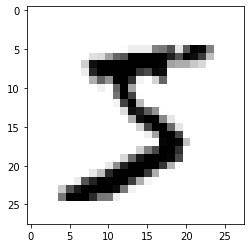

In [8]:
plt.imshow(single_img, cmap='gray_r')

In [10]:
y_train.shape

(60000,)

In [11]:
from keras.utils.np_utils import to_categorical

In [12]:
# to categorial encodes data into one-hot encoding
# pass data values and n of categories
y_cat_test = to_categorical(y_test, 10) 
y_cat_train = to_categorical(y_train, 10)

In [14]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [15]:
# processing the X data
single_img.max()

255

In [17]:
# normalizing the values manually
x_train = x_train / x_train.max() # /255 
x_test = x_test / x_test.max()

In [18]:
scaled_image = x_train[0]

In [20]:
scaled_image.max() # scale the values between 0 and 1

1.0

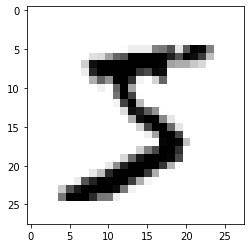

In [21]:
# visually there's no change, but the values are smaller for 
# easier analysis
plt.imshow(scaled_image, cmap='gray_r')

In [22]:
x_train.shape

(60000, 28, 28)

In [23]:
x_train = x_train.reshape(60000, 28, 28, 1) # enforcing the color channel

In [24]:
x_train.shape

(60000, 28, 28, 1)

In [25]:
x_test = x_test.reshape(10000, 28, 28, 1) 

In [26]:
x_test.shape

(10000, 28, 28, 1)

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [29]:
model = Sequential()

# CONVOLUTIONAL LAYER 
# for more complex images, set more filters
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))

# POOLING LAYER
# one idea for knowing what good values are, is to read the latest 
# papers and copy the best ideas 
model.add(MaxPool2D(pool_size=(2,2)))

# FLATTENING LAYER (2D --> 1D)
model.add(Flatten())

# DENSE LAYER
model.add(Dense(128, activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', 
             optimizer='rmsprop', 
             metrics=['accuracy'])


In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(x_train, y_cat_train, epochs=2)

Epoch 1/2
60000/60000 [==============================] - 34s 568us/step - loss: 0.1382 - accuracy: 0.9578
Epoch 2/2
60000/60000 [==============================] - 32s 533us/step - loss: 0.0485 - accuracy: 0.9853


In [32]:
model.metrics_names

['loss', 'accuracy']

In [33]:
model.evaluate(x_test, y_cat_test)

10000/10000 [==============================] - 2s 176us/step


[0.04839312155657099, 0.9843999743461609]

In [34]:
from sklearn.metrics import classification_report

In [35]:
predictions = model.predict_classes(x_test)

In [36]:
predictions


array([7, 2, 1, ..., 4, 5, 6])

In [37]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [38]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.94      0.97       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

